In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Duplicate key in file PosixPath('/opt/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc'), line 258 ('font.family : IPAexGothic')


In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("sample.csv", header=None)

In [3]:
train.head()

datetime    y week  soldout        name  kcal remarks event  payday  \
0  2013-11-18   90    月        0    厚切りイカフライ   NaN     NaN   NaN     NaN   
1  2013-11-19  101    火        1     手作りヒレカツ   NaN     NaN   NaN     NaN   
2  2013-11-20  118    水        0  白身魚唐揚げ野菜あん   NaN     NaN   NaN     NaN   
3  2013-11-21  120    木        1      若鶏ピリ辛焼   NaN     NaN   NaN     NaN   
4  2013-11-22  130    金        1    ビッグメンチカツ   NaN     NaN   NaN     NaN   

  weather precipitation  temperature  
0      快晴            --         19.8  
1      快晴            --         17.0  
2      快晴            --         15.5  
3      快晴            --         15.2  
4      快晴            --         16.1

In [4]:
test.head()

datetime week  soldout        name   kcal remarks event  payday weather  \
0  2014-10-1    水        1       メンチカツ  420.0     NaN   NaN     NaN       雨   
1  2014-10-2    木        0   バーベキューチキン  415.0     NaN   NaN     NaN       曇   
2  2014-10-3    金        0  豚肉のマスタード焼き  405.0     NaN   NaN     NaN      晴れ   
3  2014-10-6    月        1        麻婆春雨  400.0     NaN   NaN     NaN       雨   
4  2014-10-7    火        0    厚揚げ肉みそ炒め  430.0     NaN   NaN     NaN      晴れ   

  precipitation  temperature  
0             0         20.2  
1            --         23.9  
2            --         28.7  
3           0.5         21.5  
4            --         22.1

In [5]:
train.describe()

y     soldout        kcal  payday  temperature
count  207.000000  207.000000  166.000000    10.0   207.000000
mean    86.623188    0.449275  404.409639     1.0    19.252174
std     32.882448    0.498626   29.884641     0.0     8.611365
min     29.000000    0.000000  315.000000     1.0     1.200000
25%     57.000000    0.000000  386.000000     1.0    11.550000
50%     78.000000    0.000000  408.500000     1.0    19.800000
75%    113.000000    1.000000  426.000000     1.0    26.100000
max    171.000000    1.000000  462.000000     1.0    34.600000

In [6]:
train.describe(include="O")

datetime week   name   remarks event weather precipitation
count          207  207    207        21    14     207           207
unique         207    5    156         6     2       7             8
top     2013-11-18    水  メンチカツ  お楽しみメニュー  ママの会      快晴            --
freq             1   43      6        12     9      53           169

In [7]:
train.isnull().sum()

datetime           0
y                  0
week               0
soldout            0
name               0
kcal              41
remarks          186
event            193
payday           197
weather            0
precipitation      0
temperature        0
dtype: int64

In [8]:
train["kcal"] = train["kcal"].fillna(train["kcal"].mean())
train["remarks"] = train["remarks"].fillna("なし")
train["event"] = train["event"].fillna("なし")
train["payday"] = train["payday"].fillna(0)

In [9]:
train["precipitation"].value_counts()

--     169
0       23
0.5      9
1.5      2
1        1
6        1
6.5      1
2.5      1
Name: precipitation, dtype: int64

In [10]:
train["precipitation"] = train["precipitation"].apply(lambda x: -1 if x=="--" else x)

In [11]:
train.head()

datetime    y week  soldout        name        kcal remarks event  \
0  2013-11-18   90    月        0    厚切りイカフライ  404.409639      なし    なし   
1  2013-11-19  101    火        1     手作りヒレカツ  404.409639      なし    なし   
2  2013-11-20  118    水        0  白身魚唐揚げ野菜あん  404.409639      なし    なし   
3  2013-11-21  120    木        1      若鶏ピリ辛焼  404.409639      なし    なし   
4  2013-11-22  130    金        1    ビッグメンチカツ  404.409639      なし    なし   

   payday weather precipitation  temperature  
0     0.0      快晴            -1         19.8  
1     0.0      快晴            -1         17.0  
2     0.0      快晴            -1         15.5  
3     0.0      快晴            -1         15.2  
4     0.0      快晴            -1         16.1

<AxesSubplot:>

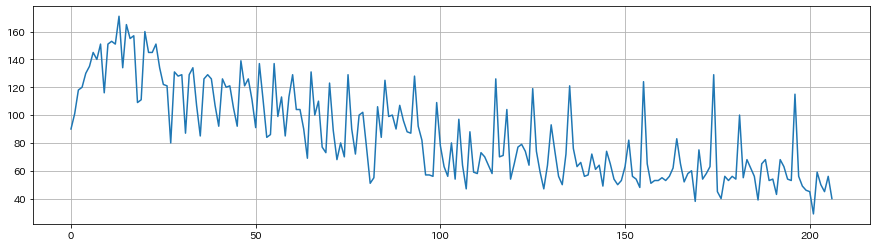

In [12]:
train["y"].plot(figsize=(15,4),grid=True)

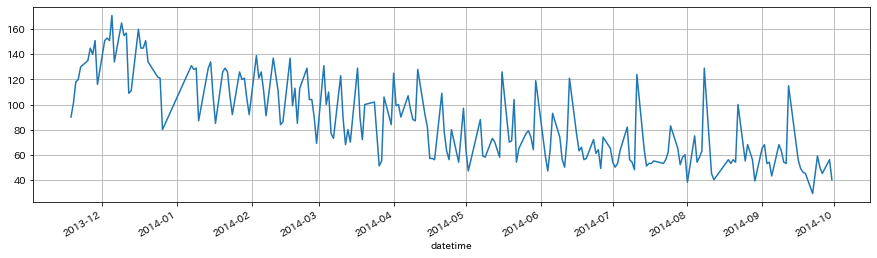

In [13]:
train.index = pd.to_datetime(train["datetime"])
train["y"].plot(figsize=(15,4),grid=True)
train = train.reset_index(drop=True)

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

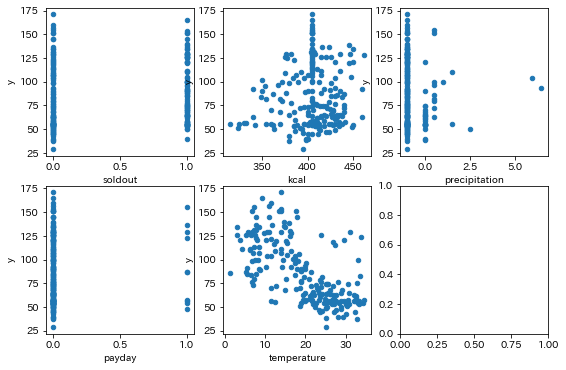

In [14]:
fig, ax = plt.subplots(2,3,figsize=(9,6))
train.plot.scatter(x="soldout", y="y", ax=ax[0][0])
train.plot.scatter(x="kcal", y="y", ax=ax[0][1])
train.plot.scatter(x="precipitation", y="y", ax=ax[0][2])
train.plot.scatter(x="payday", y="y", ax=ax[1][0])
train.plot.scatter(x="temperature", y="y", ax=ax[1][1])
plt.tight_layout

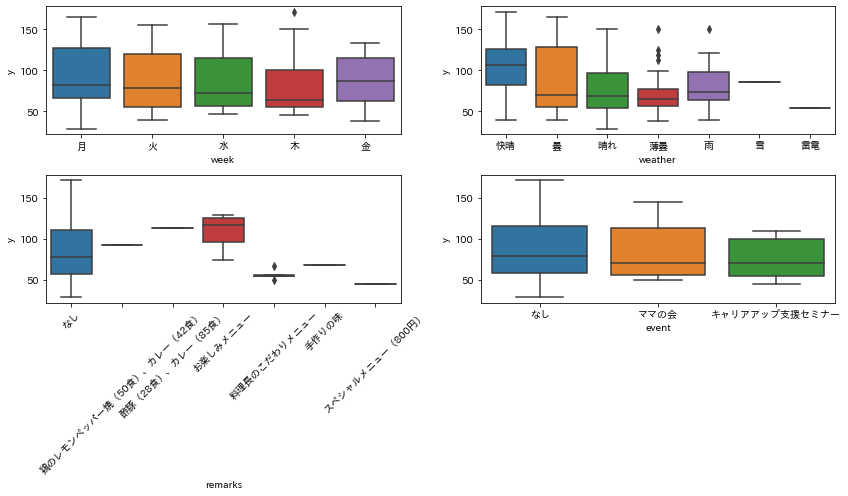

In [15]:
import seaborn as sns

fig, ax = plt.subplots(2,2,figsize=(12,7))
sns.boxplot(x="week",y="y",data=train,ax=ax[0][0])
sns.boxplot(x="weather",y="y",data=train,ax=ax[0][1])
sns.boxplot(x="remarks",y="y",data=train,ax=ax[1][0])
ax[1][0].set_xticklabels(ax[1][0].get_xticklabels(),rotation=45)
sns.boxplot(x="event",y="y",data=train,ax=ax[1][1])
plt.tight_layout()

<AxesSubplot:xlabel='fun', ylabel='y'>

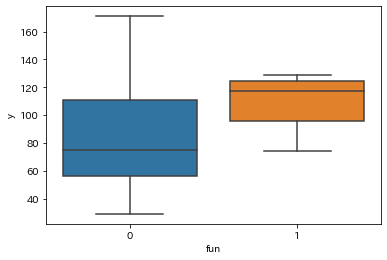

In [16]:
train["fun"] = train["remarks"].apply(lambda x: 1 if x =="お楽しみメニュー" else 0)
sns.boxplot(x="fun",y="y",data=train)

In [17]:
from scipy.stats import median_test
stat,p,med,tbl = median_test(train[train["fun"]==1]["y"], train[train["fun"]==0]["y"] )
print("p",p, "stat",stat)

p 0.007057960766247775 stat 7.2581589841730345


<AxesSubplot:>

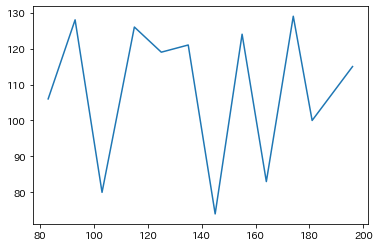

In [18]:
train[train["remarks"]=="お楽しみメニュー"]["y"].plot()

In [19]:
train[train["remarks"]=="お楽しみメニュー"].sort_values(by="y",ascending=False)

datetime    y week  soldout              name        kcal   remarks  \
174   2014-8-8  129    金        0            チキンカレー  404.409639  お楽しみメニュー   
93   2014-4-11  128    金        1            チキンカレー  404.409639  お楽しみメニュー   
115  2014-5-16  126    金        0            ポークカレー  404.409639  お楽しみメニュー   
155  2014-7-11  124    金        0            ポークカレー  404.409639  お楽しみメニュー   
135  2014-6-13  121    金        0            キーマカレー  404.409639  お楽しみメニュー   
125  2014-5-30  119    金        0            チキンカレー  404.409639  お楽しみメニュー   
196  2014-9-12  115    金        0            ポークカレー  404.409639  お楽しみメニュー   
83   2014-3-28  106    金        0            キーマカレー  404.409639  お楽しみメニュー   
181  2014-8-22  100    金        1             ロコモコ丼  404.409639  お楽しみメニュー   
164  2014-7-25   83    金        0  ひやしたぬきうどん・炊き込みご飯  404.409639  お楽しみメニュー   
103  2014-4-25   80    金        0               中華丼  404.409639  お楽しみメニュー   
145  2014-6-27   74    金        0                牛丼  404.409639  お楽しみメニュー   

    event  payday weather precipitation  temperature  fun  
174    なし     1.0       曇            -1         31.1    1  
93     なし     0.0      快晴            -1         16.5    1  
115  ママの会     0.0      快晴            -1         23.8    1  
155    なし     0.0      晴れ            -1         33.9    1  
135    なし     0.0      晴れ            -1         29.5    1  
125    なし     0.0      薄曇            -1         26.9    1  
196    なし     0.0      晴れ            -1         27.3    1  
83     なし     0.0      快晴            -1         18.5    1  
181    なし     0.0      晴れ            -1         33.1    1  
164    なし     0.0      晴れ            -1         33.6    1  
103    なし     0.0      晴れ            -1         20.8    1  
145    なし     0.0       雨             0         25.4    1

<AxesSubplot:xlabel='curry', ylabel='y'>

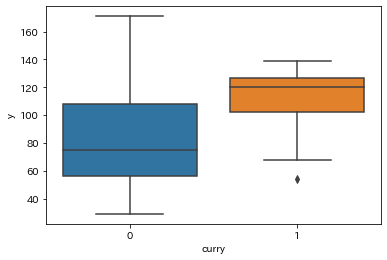

In [20]:
train["curry"] = train["name"].apply(lambda x: 1 if x.find("カレー")>0 else 0)
sns.boxplot(x="curry",y="y",data=train)

In [21]:
stat,p,med,tbl = median_test(train[train["curry"]==1]["y"], train[train["curry"]==0]["y"] )
print("p",p, "stat",stat)

p 0.018152625492681023 stat 5.581359548021204


## 前処理（trainとtestまとめて）

In [22]:
train["t"] =1
test["t"] =0
dat = pd.concat([train,test])  

In [23]:
dat.head()

datetime      y week  soldout        name        kcal remarks event  \
0  2013-11-18   90.0    月        0    厚切りイカフライ  404.409639      なし    なし   
1  2013-11-19  101.0    火        1     手作りヒレカツ  404.409639      なし    なし   
2  2013-11-20  118.0    水        0  白身魚唐揚げ野菜あん  404.409639      なし    なし   
3  2013-11-21  120.0    木        1      若鶏ピリ辛焼  404.409639      なし    なし   
4  2013-11-22  130.0    金        1    ビッグメンチカツ  404.409639      なし    なし   

   payday weather precipitation  temperature  fun  curry  t  
0     0.0      快晴            -1         19.8  0.0    0.0  1  
1     0.0      快晴            -1         17.0  0.0    0.0  1  
2     0.0      快晴            -1         15.5  0.0    0.0  1  
3     0.0      快晴            -1         15.2  0.0    0.0  1  
4     0.0      快晴            -1         16.1  0.0    0.0  1

In [24]:
dat.index = pd.to_datetime(dat["datetime"])
dat = dat["2014-05-01":]
dat = dat.reset_index(drop=True)

In [25]:
dat.head()

datetime     y week  soldout      name   kcal remarks event  payday  \
0  2014-5-1  64.0    木        0     マーボ茄子  415.0      なし    なし     0.0   
1  2014-5-2  47.0    金        0     鶏の天ぷら  420.0      なし    なし     0.0   
2  2014-5-7  88.0    水        1      肉じゃが  415.0      なし    なし     0.0   
3  2014-5-8  59.0    木        0     メンチカツ  405.0      なし    なし     0.0   
4  2014-5-9  58.0    金        1  手作りチキンカツ  434.0      なし    なし     1.0   

  weather precipitation  temperature  fun  curry  t  
0      晴れ            -1         24.0  0.0    0.0  1  
1      晴れ            -1         23.3  0.0    0.0  1  
2      晴れ            -1         18.9  0.0    0.0  1  
3      薄曇            -1         21.0  0.0    0.0  1  
4      晴れ            -1         23.4  0.0    0.0  1

In [26]:
dat[dat["t"]==1].corr()

y   soldout      kcal    payday  temperature       fun  \
y            1.000000  0.035802  0.112291  0.059975    -0.051529  0.751399   
soldout      0.035802  1.000000  0.030556 -0.091479    -0.102443 -0.182217   
kcal         0.112291  0.030556  1.000000  0.108697    -0.181352 -0.076211   
payday       0.059975 -0.091479  0.108697  1.000000     0.005828  0.088828   
temperature -0.051529 -0.102443 -0.181352  0.005828     1.000000  0.209667   
fun          0.751399 -0.182217 -0.076211  0.088828     0.209667  1.000000   
curry        0.657118 -0.162541 -0.086318  0.102076     0.176910  0.680361   
t                 NaN       NaN       NaN       NaN          NaN       NaN   

                curry   t  
y            0.657118 NaN  
soldout     -0.162541 NaN  
kcal        -0.086318 NaN  
payday       0.102076 NaN  
temperature  0.176910 NaN  
fun          0.680361 NaN  
curry        1.000000 NaN  
t                 NaN NaN

In [27]:
dat["days"] = dat.index
dat["remarks"] = dat["remarks"].fillna("なし")
dat["event"] = dat["event"].fillna("なし")
dat["payday"] = dat["payday"].fillna(0)
dat["precipitation"] = dat["precipitation"].apply(lambda x: -1 if x=="--" else x)
dat["fun"] = dat["remarks"].apply(lambda x: 1 if x=="お楽しみメニュー" else 0)
dat["curry"] = dat["name"].apply(lambda x : 1 if x.find("カレー")>=0 else 0)

In [28]:
dat.head()

datetime     y week  soldout      name   kcal remarks event  payday  \
0  2014-5-1  64.0    木        0     マーボ茄子  415.0      なし    なし     0.0   
1  2014-5-2  47.0    金        0     鶏の天ぷら  420.0      なし    なし     0.0   
2  2014-5-7  88.0    水        1      肉じゃが  415.0      なし    なし     0.0   
3  2014-5-8  59.0    木        0     メンチカツ  405.0      なし    なし     0.0   
4  2014-5-9  58.0    金        1  手作りチキンカツ  434.0      なし    なし     1.0   

  weather precipitation  temperature  fun  curry  t  days  
0      晴れ            -1         24.0    0      0  1     0  
1      晴れ            -1         23.3    0      0  1     1  
2      晴れ            -1         18.9    0      0  1     2  
3      薄曇            -1         21.0    0      0  1     3  
4      晴れ            -1         23.4    0      0  1     4

In [29]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression as LR
from sklearn.ensemble import RandomForestRegressor as RF

from sklearn.model_selection import GridSearchCV
import pydotplus

ModuleNotFoundError: No module named 'pydotplus'

In [ ]:
cols = ["precipitation","weather","days","fun","curry","y","t"]
tmp = pd.get_dummies(dat[cols])
    
trainX = tmp[tmp["t"]==1]
del trainX["t"]
testX = tmp[tmp["t"]==0]
del testX["t"]

y_train = tmp[tmp["t"]==1]["y"]
y_test = tmp[tmp["t"]==0]["y"]

In [ ]:
model1 = LR()
model1.fit(trainX["days"].values.reshape(-1,1), y_train)
pred = model1.predict(trainX["days"].values.reshape(-1,1))
pred_sub = y_train - pred

In [ ]:
rfr = RF()

In [ ]:
parameters = {"n_estimators": list(range(80,120)), "max_depth": list(range(3,8))}

In [ ]:
gcv = GridSearchCV(rfr, parameters, cv=5, scoring="neg_mean_squared_error", n_jobs=-1, return_train_score=True)
gcv.fit(trainX.iloc[:, ~trainX.columns.str.match("y")], pred_sub)

In [ ]:
gcv.best_params_

In [ ]:
pred = model1.predict(trainX["days"].values.reshape(-1,1)) + gcv.predict(trainX.iloc[:, ~trainX.columns.str.match("y")])

p = pd.DataFrame({"actual":y_train,"pred":pred})
p.plot(figsize=(15,4))
print("RMSE",MSE(y_train,pred)**0.5)

## ドロップするタイミングをFittingする変数を見つけることが課題

In [ ]:
train[train["y"]<=70].sort_values(by="y")

In [ ]:
train.sort_values(by="y")

In [ ]:
train["name"].value_counts()